# 构建环境

In [1]:
import os
# 导入os模块，该模块提供了一种方便的使用操作系统相关功能的方式，
# 例如文件和目录操作、环境变量管理等，但在这段代码中暂时未使用
# Setup Imports
import pandas as pd
# 导入pandas库并将其重命名为pd，pandas是一个强大的数据处理和分析库，
# 常用于数据读取、清洗、转换和分析等操作

import numpy as np
# 导入numpy库并将其重命名为np，numpy是Python中用于科学计算的基础库，
# 提供了高性能的多维数组对象和处理这些数组的工具

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
# 从sklearn（Scikit-learn）库的datasets模块中导入特定的数据集加载函数，
# load_breast_cancer用于加载乳腺癌数据集，load_diabetes用于加载糖尿病数据集，
# load_iris用于加载鸢尾花数据集

from sklearn.model_selection import train_test_split
# 从sklearn的model_selection模块中导入train_test_split函数，
# 该函数用于将数据集划分为训练集和测试集

from sklearn.model_selection import cross_val_score
# 从sklearn的model_selection模块中导入cross_val_score函数，
# 该函数用于进行交叉验证并返回交叉验证的得分

from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
# 从sklearn的metrics模块中导入多个评估指标函数，
# accuracy_score用于计算分类模型的准确率，
# mean_absolute_error用于计算回归模型的平均绝对误差，
# mean_squared_error用于计算回归模型的均方误差，
# root_mean_squared_error用于计算回归模型的均方根误差，
# r2_score用于计算回归模型的决定系数，
# roc_auc_score用于计算分类模型的ROC曲线下面积

import matplotlib.pyplot as plt
# 导入matplotlib库的pyplot模块并将其重命名为plt，
# matplotlib是一个用于创建可视化图表的库，pyplot提供了类似于MATLAB的绘图接口

from matplotlib.colors import ListedColormap
# 从matplotlib的colors模块中导入ListedColormap类，
# 该类用于创建自定义的颜色映射

from sklearn.inspection import DecisionBoundaryDisplay
# 从sklearn的inspection模块中导入DecisionBoundaryDisplay类，
# 该类用于可视化分类模型的决策边界

from sklearn.datasets import fetch_openml
# 从sklearn的datasets模块中导入fetch_openml函数，
# 该函数用于从OpenML平台下载数据集

from sklearn.preprocessing import LabelEncoder
# 从sklearn的preprocessing模块中导入LabelEncoder类，
# 该类用于将分类标签编码为整数

from IPython.display import display, Markdown, Latex
# 从IPython的display模块中导入display、Markdown和Latex函数，
# display用于在Jupyter Notebook中显示对象，
# Markdown用于显示Markdown格式的文本，
# Latex用于显示LaTeX格式的数学公式

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
# 从xgboost库中导入XGBClassifier和XGBRegressor类，
# XGBClassifier用于分类任务，XGBRegressor用于回归任务，
# xgboost是一个高效的梯度提升库

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# 从sklearn的ensemble模块中导入RandomForestClassifier和RandomForestRegressor类，
# RandomForestClassifier用于分类任务，RandomForestRegressor用于回归任务，
# 随机森林是一种集成学习方法

from catboost import CatBoostClassifier, CatBoostRegressor
# 从catboost库中导入CatBoostClassifier和CatBoostRegressor类，
# CatBoostClassifier用于分类任务，CatBoostRegressor用于回归任务，
# CatBoost是一个处理类别特征的梯度提升库

import torch
# 导入torch库，torch是一个深度学习框架，提供了张量计算和自动求导功能

from tabpfn import TabPFNClassifier, TabPFNRegressor
# 从tabpfn库中导入TabPFNClassifier和TabPFNRegressor类，
# TabPFNClassifier用于分类任务，TabPFNRegressor用于回归任务

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')
# 检查当前环境是否支持CUDA（NVIDIA GPU加速），
# 如果不支持，则抛出SystemError异常并提示用户启用GPU以进行快速训练

In [2]:

import subprocess
# 导入 subprocess 模块，该模块允许你生成新的进程，连接到它们的输入/输出/错误管道，
# 并获取它们的返回码。这里主要用于执行外部的 shell 命令。

import os
# 导入 os 模块，该模块提供了一种使用操作系统相关功能的便捷方式，
# 这里主要用于操作环境变量。

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
# 使用 subprocess.run() 函数执行一个 shell 命令。
# 具体命令为 'bash -c "source /etc/network_turbo && env | grep proxy"'：
#   - 'bash -c' 表示使用 bash 解释器来执行后面的命令。
#   - 'source /etc/network_turbo' 是执行 /etc/network_turbo 脚本，通常这个脚本会设置一些环境变量，
#     比如网络代理相关的变量。
#   - 'env | grep proxy' 是列出当前所有的环境变量，并过滤出包含 'proxy' 的环境变量。
# shell=True 表示通过 shell 来执行命令。
# capture_output=True 表示捕获命令的标准输出和标准错误输出。
# text=True 表示以文本模式处理输出，返回的结果是字符串类型。
# 执行结果存储在 result 变量中，它是一个 CompletedProcess 对象。

output = result.stdout
# 从 CompletedProcess 对象 result 中提取标准输出内容，存储在 output 变量中。

for line in output.splitlines():
    # 使用 splitlines() 方法将 output 字符串按行分割成一个列表，
    # 然后遍历这个列表，每次取出一行内容进行处理。

    if '=' in line:
        # 检查当前行是否包含等号 '='，因为环境变量通常的格式是 '变量名=变量值'。

        var, value = line.split('=', 1)
        # 如果包含等号，使用 split('=', 1) 方法将当前行按等号分割成两部分，
        # 第一部分赋值给 var 变量，作为环境变量的名称；
        # 第二部分赋值给 value 变量，作为环境变量的值。
        # 这里的参数 1 表示只分割一次。

        os.environ[var] = value
        # 使用 os.environ 字典来操作环境变量，将 var 作为键，value 作为值，
        # 添加或更新到当前 Python 进程的环境变量中。

In [10]:
# !unset http_proxy && unset https_proxy

# 数据准备

In [3]:
# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
# 从OpenML平台获取帕金森病数据集，用于预测是否患有帕金森病
# 特征为语音测量值（如频率、振幅等），共有195个样本
df = fetch_openml('parkinsons')

In [4]:
# 从获取的数据集中分离特征数据和目标数据
# X 存储特征数据，y 存储目标数据
X, y = df.data, df.target

In [5]:
display(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
# 添加分类变量
new_col_values = np.random.choice(['a', 'b', 'c'], size=len(X))
X['new_col_random'] = new_col_values
X['new_col_random'] = X['new_col_random'].astype('category')

In [7]:
display(X)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,new_col_random
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,b
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,c
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,c
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,a
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,b
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,c
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,c
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,a


In [8]:
# Encode target labels to classes
# 创建一个 LabelEncoder 对象，用于将目标标签编码为整数
le = LabelEncoder()
# 使用 LabelEncoder 对目标标签进行拟合和转换
# 拟合是指学习标签的编码规则，转换是指将标签按照规则转换为整数
y = le.fit_transform(y)

In [10]:
display(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# 添加缺失值
# 设置随机种子以保证结果可复现
np.random.seed(42)

# 计算 DataFrame 中单元格的总数
total_cells = X.size

# 计算需要设置为缺失值的单元格数量（10%）
num_missing = int(total_cells * 0.1)

# 随机生成行索引和列索引
row_indices = np.random.randint(0, X.shape[0], num_missing)
col_indices = np.random.randint(0, X.shape[1], num_missing)

# 将随机选中的单元格设置为缺失值
for i in range(num_missing):
    X.iloc[row_indices[i], col_indices[i]] = np.nan

print(X)

          V1       V2       V3       V4       V5       V6       V7       V8  \
0    119.992  157.302   74.997  0.00784  0.00007  0.00370  0.00554  0.01109   
1    122.400      NaN      NaN  0.00968  0.00008  0.00465  0.00696  0.01394   
2    116.682  131.111  111.555  0.01050  0.00009  0.00544  0.00781  0.01633   
3    116.676  137.871  111.366  0.00997  0.00009  0.00502  0.00698  0.01505   
4    116.014  141.781  110.655  0.01284      NaN  0.00655  0.00908  0.01966   
..       ...      ...      ...      ...      ...      ...      ...      ...   
190      NaN  230.978   94.261  0.00459  0.00003  0.00263  0.00259  0.00790   
191      NaN      NaN   89.488  0.00564  0.00003  0.00331  0.00292  0.00994   
192  174.688  240.005   74.287  0.01360  0.00008  0.00624  0.00564  0.01873   
193  198.764      NaN   74.904  0.00740  0.00004  0.00370  0.00390  0.01109   
194  214.289  260.277   77.973  0.00567      NaN  0.00295  0.00317  0.00885   

          V9    V10  ...      V14      V15     V16 

In [10]:
# Convert all categorical columns to numeric
# 遍历特征数据 X 中数据类型为 'category' 的列
for col in X.select_dtypes(['category']).columns:
    # 将分类列中的类别转换为对应的整数编码
    X[col] = X[col].cat.codes

In [26]:
print(X)

          V1       V2       V3       V4       V5       V6       V7       V8  \
0    119.992  157.302   74.997  0.00784  0.00007  0.00370  0.00554  0.01109   
1    122.400      NaN      NaN  0.00968  0.00008  0.00465  0.00696  0.01394   
2    116.682  131.111  111.555  0.01050  0.00009  0.00544  0.00781  0.01633   
3    116.676  137.871  111.366  0.00997  0.00009  0.00502  0.00698  0.01505   
4    116.014  141.781  110.655  0.01284      NaN  0.00655  0.00908  0.01966   
..       ...      ...      ...      ...      ...      ...      ...      ...   
190      NaN  230.978   94.261  0.00459  0.00003  0.00263  0.00259  0.00790   
191      NaN      NaN   89.488  0.00564  0.00003  0.00331  0.00292  0.00994   
192  174.688  240.005   74.287  0.01360  0.00008  0.00624  0.00564  0.01873   
193  198.764      NaN   74.904  0.00740  0.00004  0.00370  0.00390  0.01109   
194  214.289  260.277   77.973  0.00567      NaN  0.00295  0.00317  0.00885   

          V9    V10  ...      V14      V15     V16 

In [12]:
# 使用 train_test_split 函数将数据集划分为训练集和测试集
# test_size=0.33 表示测试集占总数据集的 33%
# random_state=42 用于设置随机种子，保证每次划分结果一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
display(Markdown(df['DESCR']))

**Author**:   
**Source**: UCI
**Please cite**: 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. BioMedical Engineering OnLine 2007, 6:23 (26 June 2007) 

* Abstract: 

Oxford Parkinson's Disease Detection Dataset

* Source:

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.

* Data Set Information:
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

Further details are contained in the following reference -- if you use this dataset, please cite: 
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).


* Attribute Information:

Matrix column entries (attributes): 
name - ASCII subject name and recording number 
MDVP:Fo(Hz) - Average vocal fundamental frequency 
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 
NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures 
DFA - Signal fractal scaling exponent 
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

Downloaded from openml.org.

# 分类模型路径

In [14]:

# 这部分注释表明接下来的代码是用于训练和评估 TabPFN 模型。
# TabPFN（Tabular Probability Forest Network）是一种用于表格数据的概率预测模型。

# 这里创建了一个 TabPFNClassifier 类的实例，并设置随机数种子为 42。
# 随机数种子的作用和上面 train_test_split 中的类似，保证模型训练过程中的随机性是可复现的。
# 接着使用 .fit(X_train, y_train) 方法对模型进行训练。fit 方法会根据训练集的特征矩阵 X_train 和对应的目标变量向量 y_train 来学习特征和标签之间的关系，调整模型的参数。
# 最后使用 .predict_proba(X_test) 方法对测试集进行预测。predict_proba 方法会返回每个样本属于各个类别的概率，结果存储在 y_pred 中。y_pred 是一个二维数组，每一行对应一个测试样本，每一列对应一个类别，元素值表示该样本属于对应类别的概率。
y_pred = TabPFNClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)

In [15]:
print("y_pred的前10个数据:", y_pred[:10])

y_pred的前10个数据: [[0.01374619 0.9862538 ]
 [0.14799224 0.8520078 ]
 [0.02323477 0.9767652 ]
 [0.07230823 0.92769176]
 [0.06272069 0.9372793 ]
 [0.05547206 0.9445279 ]
 [0.00209678 0.9979032 ]
 [0.1170013  0.8829987 ]
 [0.20528354 0.7947165 ]
 [0.5094366  0.4905634 ]]


In [16]:
# 这行注释表明下面的代码是用于计算 ROC AUC（Receiver Operating Characteristic Area Under the Curve）分数，该指标可以同时处理二分类和多分类问题。
# ROC AUC 是衡量分类模型性能的一个常用指标，它表示模型在不同分类阈值下的性能表现，取值范围在 0 到 1 之间，越接近 1 表示模型性能越好。

# len(np.unique(y)) > 2 这部分代码用于判断当前的分类任务是多分类还是二分类。
# np.unique(y) 函数会返回目标变量向量 y 中所有不重复的值，len(np.unique(y)) 则是这些不重复值的数量，也就是分类的类别数。
# 如果类别数大于 2，说明是多分类任务，此时直接使用 y_pred 来计算 ROC AUC 分数；
# 如果类别数等于 2，说明是二分类任务，在二分类情况下，roc_auc_score 函数通常只需要正类的概率，所以这里取 y_pred 的第二列（索引为 1）作为预测概率。
# roc_auc_score 函数接收两个参数，第一个是真实的目标变量向量 y_test，第二个是预测的概率值，根据任务类型选择合适的输入，最终计算出 ROC AUC 分数并存储在变量 score 中。
score = roc_auc_score(y_test, y_pred if len(np.unique(y)) > 2 else y_pred[:, 1])

In [17]:
# 这行代码使用 f-string 格式化字符串的方式打印出 TabPFN 模型的 ROC AUC 分数。
# :.4f 表示将分数保留四位小数输出，这样可以让结果更加清晰易读。
print(f"TabPFN ROC AUC: {score:.4f}")

TabPFN ROC AUC: 0.9669


In [18]:
# 比较不同的机器学习模型，通过在数据的不同部分上多次训练每个模型，
# 并对它们的性能得分进行平均，以获得更可靠的性能估计
# 以下开始定义要比较的机器学习模型列表
# 定义模型
models = [
    # 模型名称为 'TabPFN'，对应的模型实例是 TabPFNClassifier，设置随机种子为 42 以保证结果可复现
    ('TabPFN', TabPFNClassifier(random_state=42)),
    # 模型名称为 'RandomForest'，对应的模型实例是 RandomForestClassifier，设置随机种子为 42 以保证结果可复现
    ('RandomForest', RandomForestClassifier(random_state=42)),
    # 模型名称为 'XGBoost'，对应的模型实例是 XGBClassifier，设置随机种子为 42 以保证结果可复现
    ('XGBoost', XGBClassifier(random_state=42)),
    # 模型名称为 'CatBoost'，对应的模型实例是 CatBoostClassifier，设置随机种子为 42 以保证结果可复现，
    # verbose=0 表示训练过程中不输出详细信息
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# 计算得分
# 根据标签 y 中不同类别的数量来确定使用的评分指标
# 如果标签 y 中不同类别的数量大于 2，即多分类问题，使用 'roc_auc_ovr'（One-vs-Rest ROC AUC）作为评分指标
# 否则，使用 'roc_auc' 作为评分指标
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
# 初始化一个字典 scores 来存储每个模型的平均交叉验证得分
# 遍历 models 列表中的每个模型，使用 cross_val_score 函数进行 5 折交叉验证
# cross_val_score 函数会将数据集 X 和标签 y 划分为 5 个不同的部分，对每个部分进行一次训练和验证
# scoring 参数指定使用前面确定的评分指标，n_jobs=1 表示使用 1 个 CPU 核心进行计算，verbose=1 表示输出详细信息
# 最后使用 .mean() 计算 5 次验证得分的平均值，将模型名称作为键，平均得分作为值存储在 scores 字典中
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=10, verbose=0).mean()
          for name, model in models}

Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

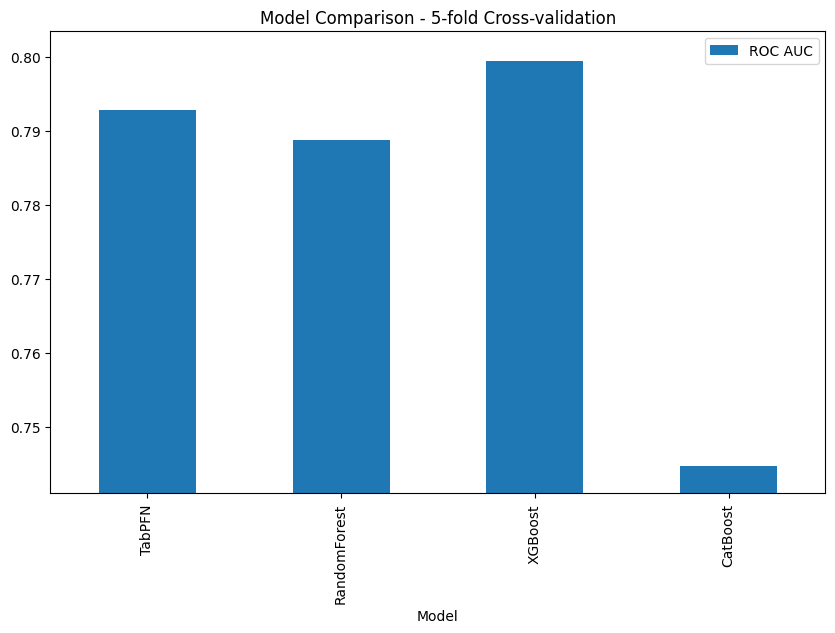

In [19]:
# 绘制结果
# 将 scores 字典中的键值对转换为列表，创建一个 DataFrame，列名为 'Model' 和 'ROC AUC'
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
# 使用 DataFrame 的 plot 方法绘制柱状图，x 轴为 'Model'，y 轴为 'ROC AUC'，图形大小为 (10, 6)
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
# 设置 y 轴的范围，下限为最小得分的 0.995 倍，上限为最小（1.0 和最大得分的 1.005 倍）
ax.set_ylim(df['ROC AUC'].min() * 0.995, min(1.0, df['ROC AUC'].max() * 1.005))
# 设置图形的标题为 'Model Comparison - 5-fold Cross-validation'
ax.set_title('Model Comparison - 5-fold Cross-validation')

## Post Hoc Ensembles

In [21]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier
# 从tabpfn_extensions库的post_hoc_ensembles模块的sklearn_interface子模块中导入AutoTabPFNClassifier类，
# 该类用于进行后处理集成，可提升TabPFN的性能。

In [22]:

clf = AutoTabPFNClassifier(max_time=30) 
# 初始化AutoTabPFNClassifier分类器，max_time=30表示集成过程的最大运行时间为30秒，
# 通常来说，更长的集成时间会带来更好的结果。

clf.fit(X_train, y_train,)
# 使用训练数据X_train和对应的标签y_train对分类器进行训练。

2025-02-20 10:24:54 INFO     Using `default` preset for Post Hoc Ensemble.
2025-02-20 10:24:54 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-02-20 10:24:54 INFO     Using task type: binary_classification
2025-02-20 10:24:54 INFO     Obtaining TabPFN models from a random portfolio.
2025-02-20 10:24:59 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_rf_pfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_tabpfn_model_6', 'random_tabpfn_model_7', 'random_rf_pfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_tabpfn_model_13', 'random_rf_pfn_model_14', 'random_rf_pfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_rf_pfn_model_18', 'random_tabpfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_rf

AutoTabPFNClassifier()

In [23]:

prediction_probabilities = clf.predict_proba(X_test)
# 调用分类器的predict_proba方法对测试数据X_test进行预测，得到每个样本属于各个类别的概率。

predictions = np.argmax(prediction_probabilities, axis=-1)
# 使用numpy的argmax函数，沿着最后一个轴（axis=-1）找出预测概率最大的类别索引，作为最终的预测标签。

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
# 计算并打印ROC AUC得分，通过比较测试集标签y_test和预测概率的第二列（因为是二分类问题，第二列表示正类的概率）得到。

print("Accuracy", accuracy_score(y_test, predictions))
# 计算并打印准确率，通过比较测试集标签y_test和预测标签predictions得到。

ROC AUC: 0.9607843137254901
Accuracy 0.9076923076923077


## shap值可解释性


In [31]:
from tabpfn_extensions import interpretability
feature_names = X.columns
n_samples = 50

In [32]:
feature_names 

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'new_col_random'],
      dtype='object')

In [33]:
# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation",
)

PermutationExplainer explainer: 51it [11:02, 13.25s/it]                        


Computing shap values for the first class (index 0).


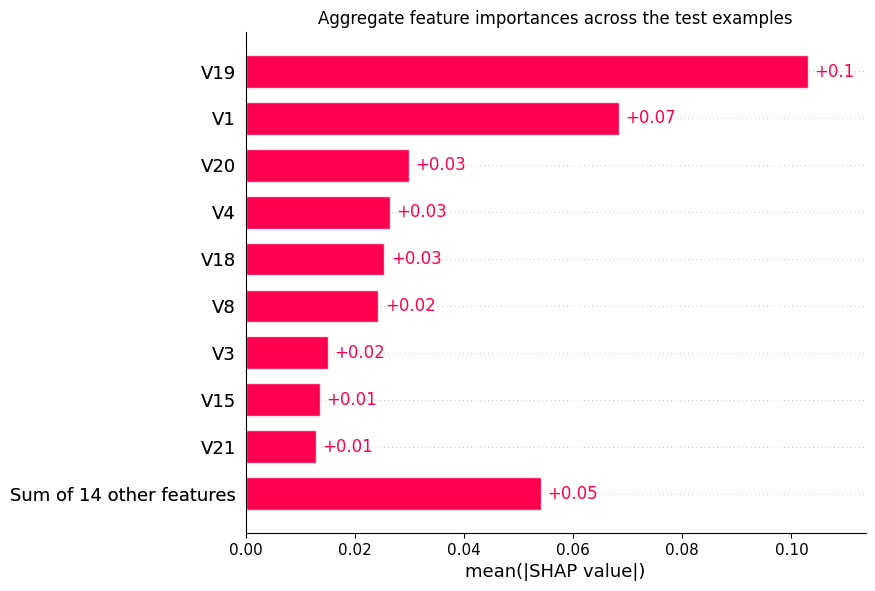

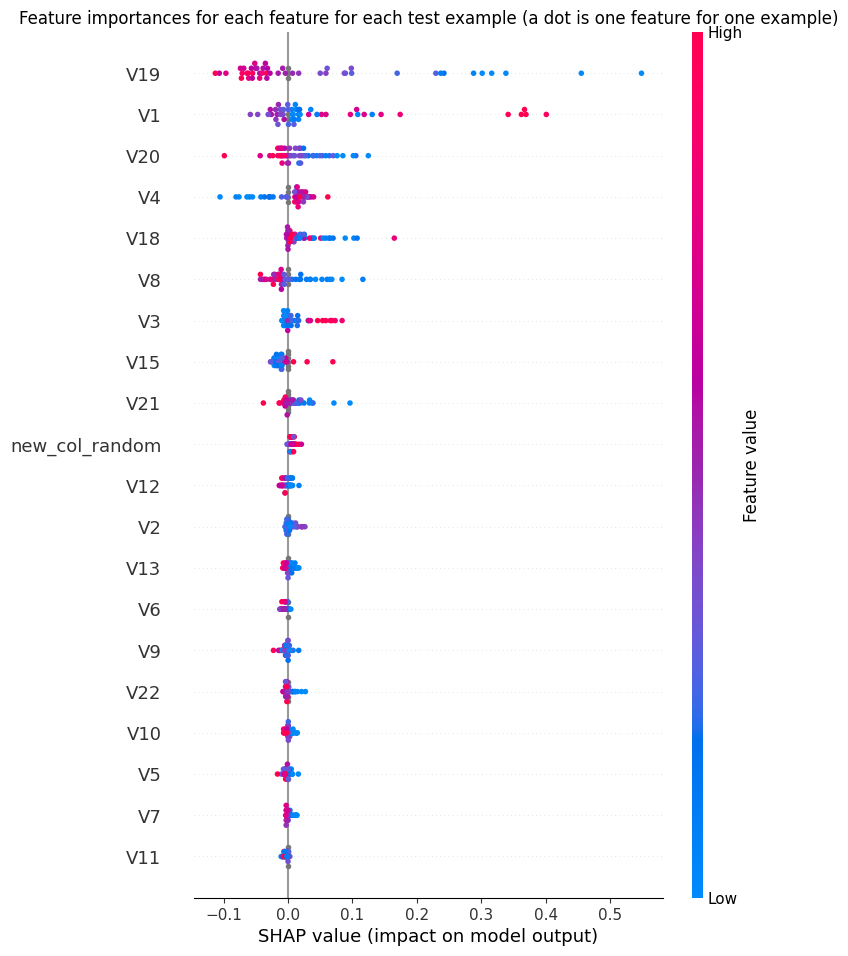

Now we analyze the strongest feature interactions of the most important feature, namely the feature "18".


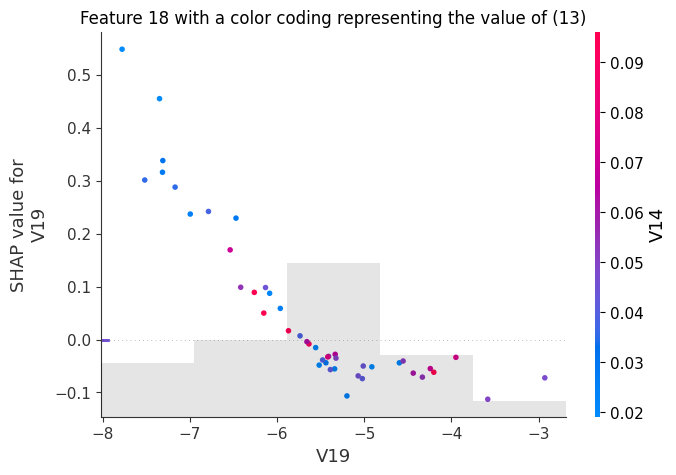

In [34]:
# Create visualization
fig = interpretability.shap.plot_shap(shap_values)

## 特征选择

In [38]:
# 导入所需的 TabPFNClassifier 类，用于构建分类模型
# 假设 TabPFNClassifier 是一个自定义的分类器类，可能用于表格数据的分类任务
from some_module import TabPFNClassifier  

# 初始化模型
# 创建一个 TabPFNClassifier 类的实例，设置 n_estimators 参数为 3
# n_estimators 可能控制模型中使用的估计器（例如决策树等）的数量
clf = TabPFNClassifier(n_estimators=3)

# 导入特征选择相关的功能
# 假设 interpretability 是一个自定义的解释性工具包，其中包含了特征选择的功能
from interpretability.feature_selection import feature_selection

# 进行特征选择
# 调用 interpretability 工具包中 feature_selection 模块的 feature_selection 函数
# 该函数接受以下参数：
# - estimator: 传入之前初始化好的分类器模型 clf，特征选择过程可能会基于这个模型的表现来进行
# - X: 输入的特征矩阵，包含了所有可能用于模型训练的特征数据
# - y: 对应的目标标签，即与特征矩阵 X 中的样本对应的分类标签
# - n_features_to_select: 指定要选择的特征数量，这里设置为 5，表示最终要选出 5 个特征
# - feature_names: 一个包含所有特征名称的列表，方便后续根据索引获取特征的具体名称
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names
)

# 打印选择的特征
# 初始化一个空列表，用于存储最终选择的特征名称
selected_features = []
# 遍历所有特征的索引
for i in range(len(feature_names)):
    # sfs.get_support() 方法返回一个布尔数组，指示每个特征是否被选中
    # 如果第 i 个特征被选中（即 sfs.get_support()[i] 为 True）
    if sfs.get_support()[i]:
        # 从 feature_names 列表中获取对应的特征名称，并添加到 selected_features 列表中
        selected_features.append(feature_names[i])

print("\nSelected features:")
# 遍历 selected_features 列表，依次打印出每个被选中的特征名称
for feature in selected_features:
    print(f"- {feature}")

ModuleNotFoundError: No module named 'some_module'

# 回归任务

In [40]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s
# 从OpenML平台获取波士顿住房数据集，该数据集用于回归任务，即预测房屋价格
# 特征包含邻里特征和住房属性，共有506个邻里样本
# 目标是预测房屋的中位价值，单位为千美元
df = fetch_openml(data_id=531, as_frame=True)

In [42]:

# 从获取的数据集中分离特征数据和目标数据
# X 存储特征数据，y 存储目标数据
X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
# 遍历特征数据 X 中数据类型为 'object' 或 'category' 的列
for col in X.select_dtypes(['object', 'category']).columns:
    # 使用 pd.factorize() 函数将分类列转换为整数编码
    # pd.factorize() 函数返回一个元组，第一个元素是编码后的整数数组，第二个元素是唯一值的索引
    # 这里取元组的第一个元素，即编码后的整数数组
    X[col] = pd.factorize(X[col])[0]  


In [43]:

# 计算 DataFrame 中单元格的总数
total_cells = X.size

# 计算需要设置为缺失值的单元格数量（20%）
num_missing = int(total_cells * 0.2)

# 随机生成行索引和列索引
row_indices = np.random.randint(0, X.shape[0], num_missing)
col_indices = np.random.randint(0, X.shape[1], num_missing)

# 将随机选中的单元格设置为缺失值
for i in range(num_missing):
    X.iloc[row_indices[i], col_indices[i]] = np.nan

print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0        NaN  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  NaN  296.0   
1    0.02731   NaN   7.07   0.0    NaN    NaN  78.9  4.9671  1.0    NaN   
2    0.02729   0.0   7.07   0.0    NaN  7.185  61.1  4.9671  1.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  2.0  222.0   
4    0.06905   0.0   2.18   0.0    NaN  7.147  54.2  6.0622  2.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1     NaN  NaN  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7     NaN  0.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976   NaN     NaN  NaN  273.0   
504  0.10959   NaN  11.93   0.0  0.573  6.794  89.3  2.3889  NaN  273.0   
505  0.04741   0.0  11.93   0.0    NaN  6.030  80.8     NaN  0.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [44]:

# 使用 train_test_split 函数将数据集划分为训练集和测试集
# test_size=0.33 表示测试集占总数据集的 33%
# random_state=42 用于设置随机种子，保证每次划分结果一致
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
# 在 Jupyter Notebook 中显示数据集的描述信息
# df['DESCR'] 存储了数据集的详细描述，使用 Markdown 格式显示
display(Markdown(df['DESCR']))

# 在 Jupyter Notebook 中显示特征数据 X
display(X)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's


Information about the dataset
CLASSTYPE: numeric
CLASSINDEX: last

Downloaded from openml.org.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,NaN,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,NaN,296.0,15.3,396.90,4.98
1,0.02731,NaN,7.07,0.0,NaN,NaN,78.9,4.9671,1.0,NaN,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,NaN,7.185,61.1,4.9671,1.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,2.0,222.0,18.7,NaN,2.94
4,0.06905,0.0,2.18,0.0,NaN,7.147,54.2,6.0622,2.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,NaN,NaN,273.0,NaN,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,NaN,0.0,273.0,21.0,NaN,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,NaN,NaN,NaN,273.0,21.0,396.90,NaN
504,0.10959,NaN,11.93,0.0,0.573,6.794,89.3,2.3889,NaN,273.0,21.0,393.45,6.48


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

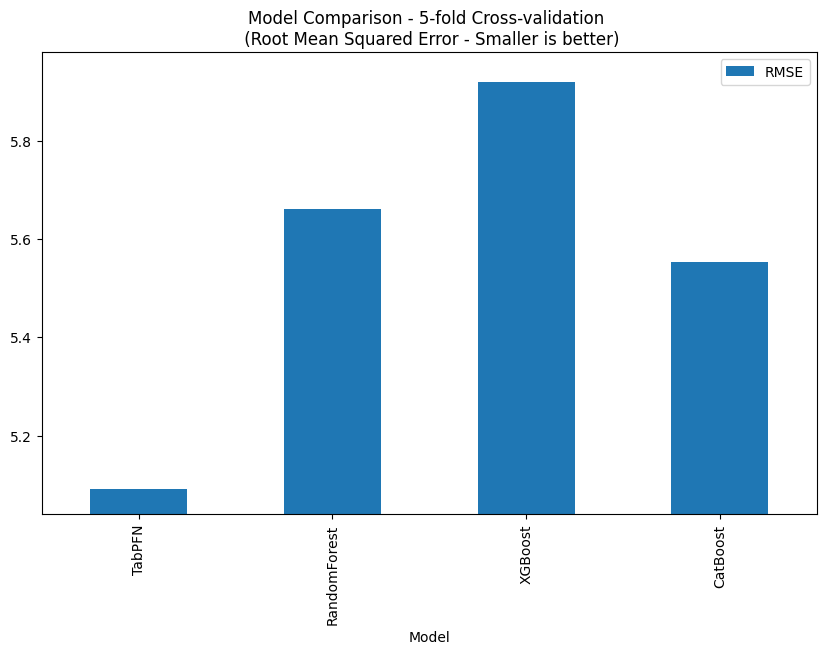

In [46]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'neg_root_mean_squared_error'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=10).mean()
          for name, model in models}


# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'RMSE'])
df.RMSE = -df.RMSE # Smaller is better
ax = df.plot(x='Model', y='RMSE', kind='bar', figsize=(10, 6))
ax.set_ylim(df['RMSE'].min() * 0.99, df['RMSE'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

In [48]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor
# 从 tabpfn_extensions 库的 post_hoc_ensembles 模块的 sklearn_interface 子模块中
# 导入 AutoTabPFNRegressor 类。这个类通常用于实现自动化的 TabPFN 回归模型，
# 它遵循了 Scikit - learn 的接口规范，方便与 Scikit - learn 中的其他工具协同使用。

reg = AutoTabPFNRegressor(max_time=30) # runs for 30 seconds
# 创建一个 AutoTabPFNRegressor 回归模型的实例。
# max_time=30 表示该模型的训练过程最多持续 30 秒，
# 超过这个时间后训练将停止，以控制训练的时间成本。

reg.fit(X_train, y_train)
# 调用 AutoTabPFNRegressor 模型的 fit 方法对模型进行训练。
# X_train 是训练集的特征数据，y_train 是训练集的目标数据。
# 模型会根据训练数据学习特征与目标之间的关系，调整自身的参数。

predictions = reg.predict(X_test)
# 调用训练好的模型的 predict 方法对测试集进行预测。
# X_test 是测试集的特征数据，模型会根据学习到的规律对 X_test 对应的目标值进行预测，
# 预测结果存储在 predictions 变量中。

print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
# 使用 Scikit - learn 的 mean_squared_error 函数计算预测结果的均方误差（MSE）。
# y_test 是测试集的真实目标值，predictions 是模型的预测值。
# 均方误差衡量了预测值与真实值之间误差的平方的平均值，值越小表示模型的预测效果越好。
# 最后将计算得到的均方误差打印输出。

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
# 使用 Scikit - learn 的 mean_absolute_error 函数计算预测结果的平均绝对误差（MAE）。
# 平均绝对误差衡量了预测值与真实值之间误差的绝对值的平均值，同样值越小表示模型性能越好。
# 打印输出计算得到的平均绝对误差。

print("R - squared (R^2):", r2_score(y_test, predictions))
# 使用 Scikit - learn 的 r2_score 函数计算预测结果的决定系数（R²）。
# 决定系数衡量了模型对数据的拟合优度，取值范围在负无穷到 1 之间，
# 越接近 1 表示模型对数据的拟合效果越好。
# 打印输出计算得到的决定系数。


2025-02-20 11:19:05 INFO     Using `default` preset for Post Hoc Ensemble.
2025-02-20 11:19:05 INFO     No categorical_feature_indices given. Assuming no categorical features.
2025-02-20 11:19:05 INFO     Using task type: regression
2025-02-20 11:19:05 INFO     Obtaining TabPFN models from a random portfolio.
2025-02-20 11:19:11 INFO     Using 100 base models: ['default_tabpfn_model_0', 'random_tabpfn_model_1', 'random_rf_pfn_model_2', 'random_tabpfn_model_3', 'random_rf_pfn_model_4', 'random_rf_pfn_model_5', 'random_rf_pfn_model_6', 'random_rf_pfn_model_7', 'random_tabpfn_model_8', 'random_tabpfn_model_9', 'random_rf_pfn_model_10', 'random_rf_pfn_model_11', 'random_tabpfn_model_12', 'random_rf_pfn_model_13', 'random_tabpfn_model_14', 'random_tabpfn_model_15', 'random_rf_pfn_model_16', 'random_tabpfn_model_17', 'random_tabpfn_model_18', 'random_rf_pfn_model_19', 'random_rf_pfn_model_20', 'random_rf_pfn_model_21', 'random_tabpfn_model_22', 'random_rf_pfn_model_23', 'random_tabpfn_model_

tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

2025-02-20 11:19:41 INFO     Successfully downloaded to /root/tabpfn-extensions/src/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-regressor.ckpt
2025-02-20 11:19:43 INFO     Time limit reached.
2025-02-20 11:19:43 INFO     Stop validation of all models after 2 models in repeat 1.
2025-02-20 11:19:43 INFO     As this is the first repeat, we trim down the models to all so-far run models!
2025-02-20 11:19:43 INFO     Order of selections: [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
2025-02-20 11:19:43 INFO     Val loss over iterations: [19.634573821186653, 19.634573821186653, 19.551744676003157, 19.495006708298465, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.485746408955833, 19.48574640895583, 19.48574640895583, 19.48574640895583, 19.48574640895583, 19.48574640895583, 19.48574640895583, 19.48574640895583, 19.48574640895583, 

Mean Squared Error (MSE): 14.138514751919763
Mean Absolute Error (MAE): 2.5847138981619278
R - squared (R^2): 0.8131766196773802
